# Regresión lineal en Python

## Ejercicio de Diabetes

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# linear_model = para hacer el equivalente de (lm) de Rstudio
# sklearn.metrics = subpaquete, 
# mean_squared_error = mide como la recta se aproxima o aleja del conjunto de datos
# r2_score = Coeficiente de determinación del modelo lineal

In [4]:
diabetes = datasets.load_diabetes()
print(type(diabetes)) #Es un aglomerado de datos preparado especialmente para sklearn
#Es la forma en que sklearn identifica los arhivos por lo que necesitamos transformarlos

print(type(diabetes.data)) #Esa opción ya es un array para poder trabajar

print(diabetes.data.shape) #Observo las filas y las columnas

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(442, 10)


In [9]:
#Me quedo con la segunda columna solo y todas las filas y creo 2 variable
# Variable x para array de datos
# Variable y para la predicción

x0 = diabetes.data[:, #Todas las filas
                  2] #Solo la segunda columna
# x0 por ser un array multimidimensional 
#necesitamos convertilo en unidimensional con 1 sola columna para ello hacemos:

x1 = diabetes.data[:,2].reshape(-1,1) #Otra forma de redimensionar el array para 1 sola dimensión

x = diabetes.data[:, #Todas las filas
                  np.newaxis, #Parametro para convertir en 1 sola dimensión
                  #Lo que hace es crear una nueva dimensión con los datos de la 2da columna
                  2] #Solo la segunda columna

y = diabetes.target # Target es el objetivo del valor, valor que se desea extraer de la predicción

#Como son 442 filas verifico las primeras 5 solamente para ver os valores.

print(x[:5]) #Obteniendo solo los primeros 5 valores del array
print(y[:5]) #Obteniendo solo los primeros 5 valores de la predicción

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]
[151.  75. 141. 206. 135.]


In [10]:
# 1) Creando el modelo lineal

mod = linear_model.LinearRegression() #Aqui obtengo el modelo de regresión lineal
#Depues de esto solo ajustamos los datos.

# 2) Ajustamos los datos con la x e y
print(mod.fit(x, y)) #Calcula los coeficientes de la regresión con la forma de los datos

# 3) Mostrando los coeficientes de la regresión lineal
print(mod.coef_) #Coeficiente del eje de las X

# 4) creando la ordenada en el origen de la regresión lineal
print(mod.intercept_) #Ordenada en el origen

LinearRegression()
[949.43526038]
152.1334841628967


$$\tilde{y} = 949.43526038 \cdot x + 152.13348416289594$$

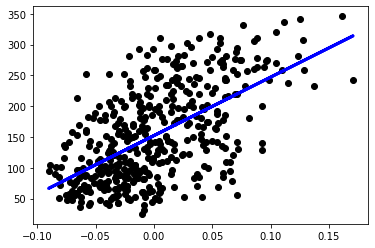

In [11]:
#Graficando

#Calculando y mostrando la regresión junto con los puntos
plt.scatter(x,y, color = 'black')

#Superponemos encima una recta de regresión
plt.plot(x,  #adjunto las mismas x del conjunto de datos
         mod.predict(x), #Modelo predictivo de los datos 
         color = 'blue', 
         linewidth = 3) #Grosor de la linea
plt.show()

#### Formula del error cuadrado medio

$$MSE = \frac{\sum^n_{i=1}(y_i-\tilde{y}_i)^2}{n}$$

In [12]:
#Comprovar si esta bien o no es calculado el R^2

#Calculando el error cuadrado medio
mean_squared_error(y, #datos del eje y
                  mod.predict(x)) #Modelo predictivo de los datos en x


3890.4565854612724

In [13]:
# Valor de r^2 es entre 0 y 1 y mientras mas se aproxime a 1
# Los datos se aproximan mas al modelo lineal
r2_score(y, mod.predict(x))

0.3439237602253803

Analisis:

En el estudio no se saca ninguna conclusión porque el conjunto de datos no se aproxima al modelo de regresión linal 

# Tecnica usada para algoritmos de machine learning

1) Toma todos los datos a estudiar
2) divido el conjunto de datos a estudiar 

Una técnica que utilizo muchísimo cuando hago algoritmos de machine learning en particular la regresión
lineal que os he explicado en la clase anterior es un algoritmo de machine learning o de aprendizaje
automatizado es 

1) el de dividir el conjunto de datos del que dispongo para que no todos todos formen parte del modelo que creo. 

* Tomo un 80 por ciento aproximadamente en un 75 80 por ciento de los datos para crear el modelo 
* El otro 20 25 por ciento restante para validar que el modelo ha sido creado correctamente.

Esta técnica se llama **la técnica de dividir en conjunto de entrenamiento y conjunto de validación** 
Sirve precisamente para evitar un problema muy típico que es el problema del Over fitting.

Si vosotros aportáis muchísimos datos a un modelo, el modelo no acaba aprendiendo. La tendencia global del mismo si no acaba aprendiendo el detalle específico de cada uno de ellos.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Fase 1 de Train

In [15]:
# 1) Conjunto de datos a estudiar
diabetes = datasets.load_diabetes()

# 2) Creo el vector X e Y
x1 = diabetes.data[:,2].reshape(-1,1) #Otra forma de redimensionar el array para 1 sola dimensión
y = diabetes.target # Target es el objetivo del valor, valor que se desea extraer de la predicción

3) 
Dividir el conjunto de datos X e Y en X para entrenar y X para probar para testear de modo que uno vendría aquí crearía su variable su variable x Trainee y tomaría de la X todas las filas

In [16]:
# 3.1) Divido el conjunto de dato X

# X para entrenar
x1_train = x1[:-60] #Tomo todas las filas a excepción de las ultimas 60

# X para testear
x1_test = x1[-60:] #Todas de las ultimas 60 en adelante

# 3.2) Divido el conjunto de dato Y

# XY para entrenar
y_train = y[:-60] #Tomo todas las filas a excepción de las ultimas 60

# Y para testear
y_test = y[-60:] #Todas de las ultimas 60 en adelante

#Con esto tenemos que vamos a usar todos los datos excepto los ultimos 60 para crear la regresión lineal

In [17]:
# Creando el modelo lineal

mod = linear_model.LinearRegression() #Aqui obtengo el modelo de regresión lineal
#Depues de esto solo ajustamos los datos.

# Ajustamos los datos con la x e y
print(mod.fit(x1_train, y_train)) #Calcula los coeficientes de la regresión con la forma de los datos

# Mostrando los coeficientes de la regresión lineal
print(mod.coef_) #Coeficiente del eje de las X

# 4) creando la ordenada en el origen de la regresión lineal
print(mod.intercept_) #Ordenada en el or

LinearRegression()
[940.05574082]
152.80161883617347


$$\tilde{y} = 940.05574082 \cdot x + 152.80161883617347$$

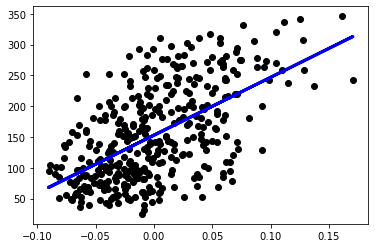

In [19]:
#Graficando con el 80% de los datos

#Calculando y mostrando la regresión junto con los puntos
plt.scatter(x1_train,y_train, color = 'black')

#Superponemos encima una recta de regresión
plt.plot(x1_train,  #adjunto las mismas x del conjunto de datos
         mod.predict(x1_train), #Modelo predictivo de los datos 
         color = 'blue', 
         linewidth = 3) #Grosor de la linea
plt.show()

In [21]:
#Comprovar si esta bien o no es calculado el R^2

#Calculando el error cuadrado medio
mean_squared_error(y_train, #datos del eje y
                  mod.predict(x1_train)) #Modelo predictivo de los datos en x

3954.0083497655914

In [20]:
# Valor de r^2 es entre 0 y 1 y mientras mas se aproxime a 0
# Los datos se aproximan mas al modelo lineal
r2_score(y_train, mod.predict(x1_train))

0.3331463299382712

### Fase 2 de Testing

En la fase de testing lo que hace es:
Tomar el conjunto de datos de testing para con el modelo creado con los datos de entrenamiento, ajustarlo y ver como le quedan los datos.

In [22]:
y_pred = mod.predict(x1_test)
mean_squared_error(y_test,y_pred) #Esto siginfica que no sufre problemas de over fittign
#Eso es en razon de que se aproxima al error cuadrado medio calculado para xtrain

3490.5984515464324

In [31]:
#Verificando
print(mean_squared_error(y_train,mod.predict(x1_train)))
print(mean_squared_error(y_test,y_pred))

#Tiene una diferencia de 4,6%
print((mean_squared_error(y_train,mod.predict(x1_train))-mean_squared_error(y_test,y_pred))/100)

3954.0083497655914
3490.5984515464324
4.63409898219159


In [32]:
r2_score(y_test,y_pred) #Este valor de R^2 es superioro al calculado anteriormente
#Por lo que se puede demostrar que se aproximas mas al modelo lineal

0.4103896998623372

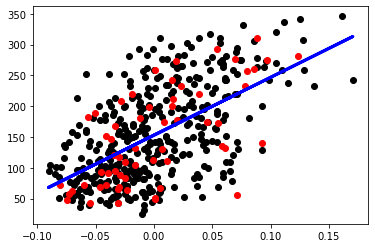

In [33]:
#Graficando en la fase de testing

#Calculando y mostrando la regresión junto con los puntos
plt.scatter(x1_train,y_train, color = 'black')
plt.scatter(x1_test, y_test, color = 'red') #Para verificar como quedan los datos de validación 
                                            #en comparación a los originales


#Superponemos encima una recta de regresión
plt.plot(x1_train,  #adjunto las mismas x del conjunto de datos
         mod.predict(x1_train), #Modelo predictivo de los datos 
         color = 'blue', 
         linewidth = 3) #Grosor de la linea
plt.show()